In [75]:
#Importing the data and the libraries

import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv('data/starbucks_drinkMenu_expanded.csv')
df2 = pd.read_csv('data/starbucks-menu-nutrition-drinks.csv')
df3 = pd.read_csv('data/starbucks-menu-nutrition-food-ver2.csv', encoding= 'unicode_escape')
df1.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


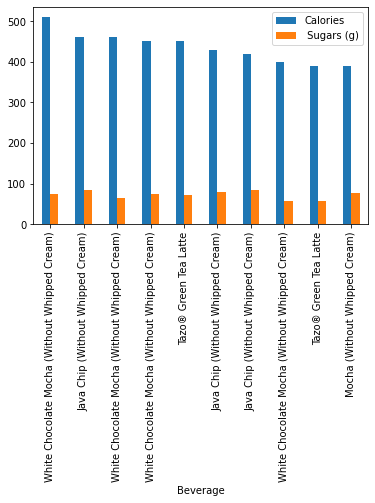

In [76]:
#QUESTION: AMONG DRINKS, WHICH CATEGORY HAS THE HIGHEST CALORIES and ASSOCIATED SUGAR CONTENT
# SEEMS LIKE WHITE CHOCOLATE MOCHA (WITHOUT WHIPPED CREAM) HAS THE HIGHEST CALORIES BUT NOT THE HIGHEST SUGARS

df2= df1.sort_values('Calories', ascending= False).head(10)
df2.plot('Beverage', y=['Calories', ' Sugars (g)'], kind= 'bar')

plt.xticks(rotation=90)
plt.show()

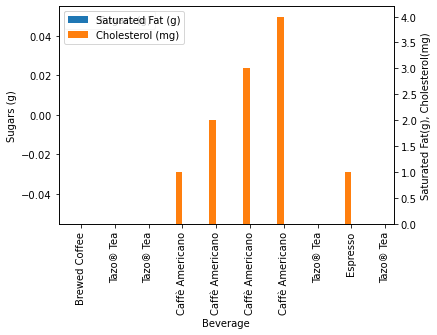

In [77]:
#QUESTION: WHICH CATEGORY OF DRINKS HAS THE LOWEST SUGAR AND WHAT IS ASSOCIATED CHOLESTEROL AND SATURATED FAT  
#SEEMS HEALTHY DRINKS ARE BREWED COFFEE AND TAZO TEA WITH NO SUGAR OR CHOLESTEROL OR SATURATED FAT


df2= df1.sort_values(' Sugars (g)').head(10)
fig = plt.figure() # Create matplotlib figure


ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
width= 0.3


ax = df2.plot('Beverage', y=' Sugars (g)', color= 'red', kind= 'bar', width= width, ax= ax, position= 2)
ax2 = df2.plot('Beverage', y=['Saturated Fat (g)', 'Cholesterol (mg)'], kind= 'bar', width= width1, ax= ax2, position= 1)
ax.set_ylabel('Sugars (g)')
ax.legend(loc='upper left')
ax2.set_ylabel('Saturated Fat(g), Cholesterol(mg)')
plt.show()

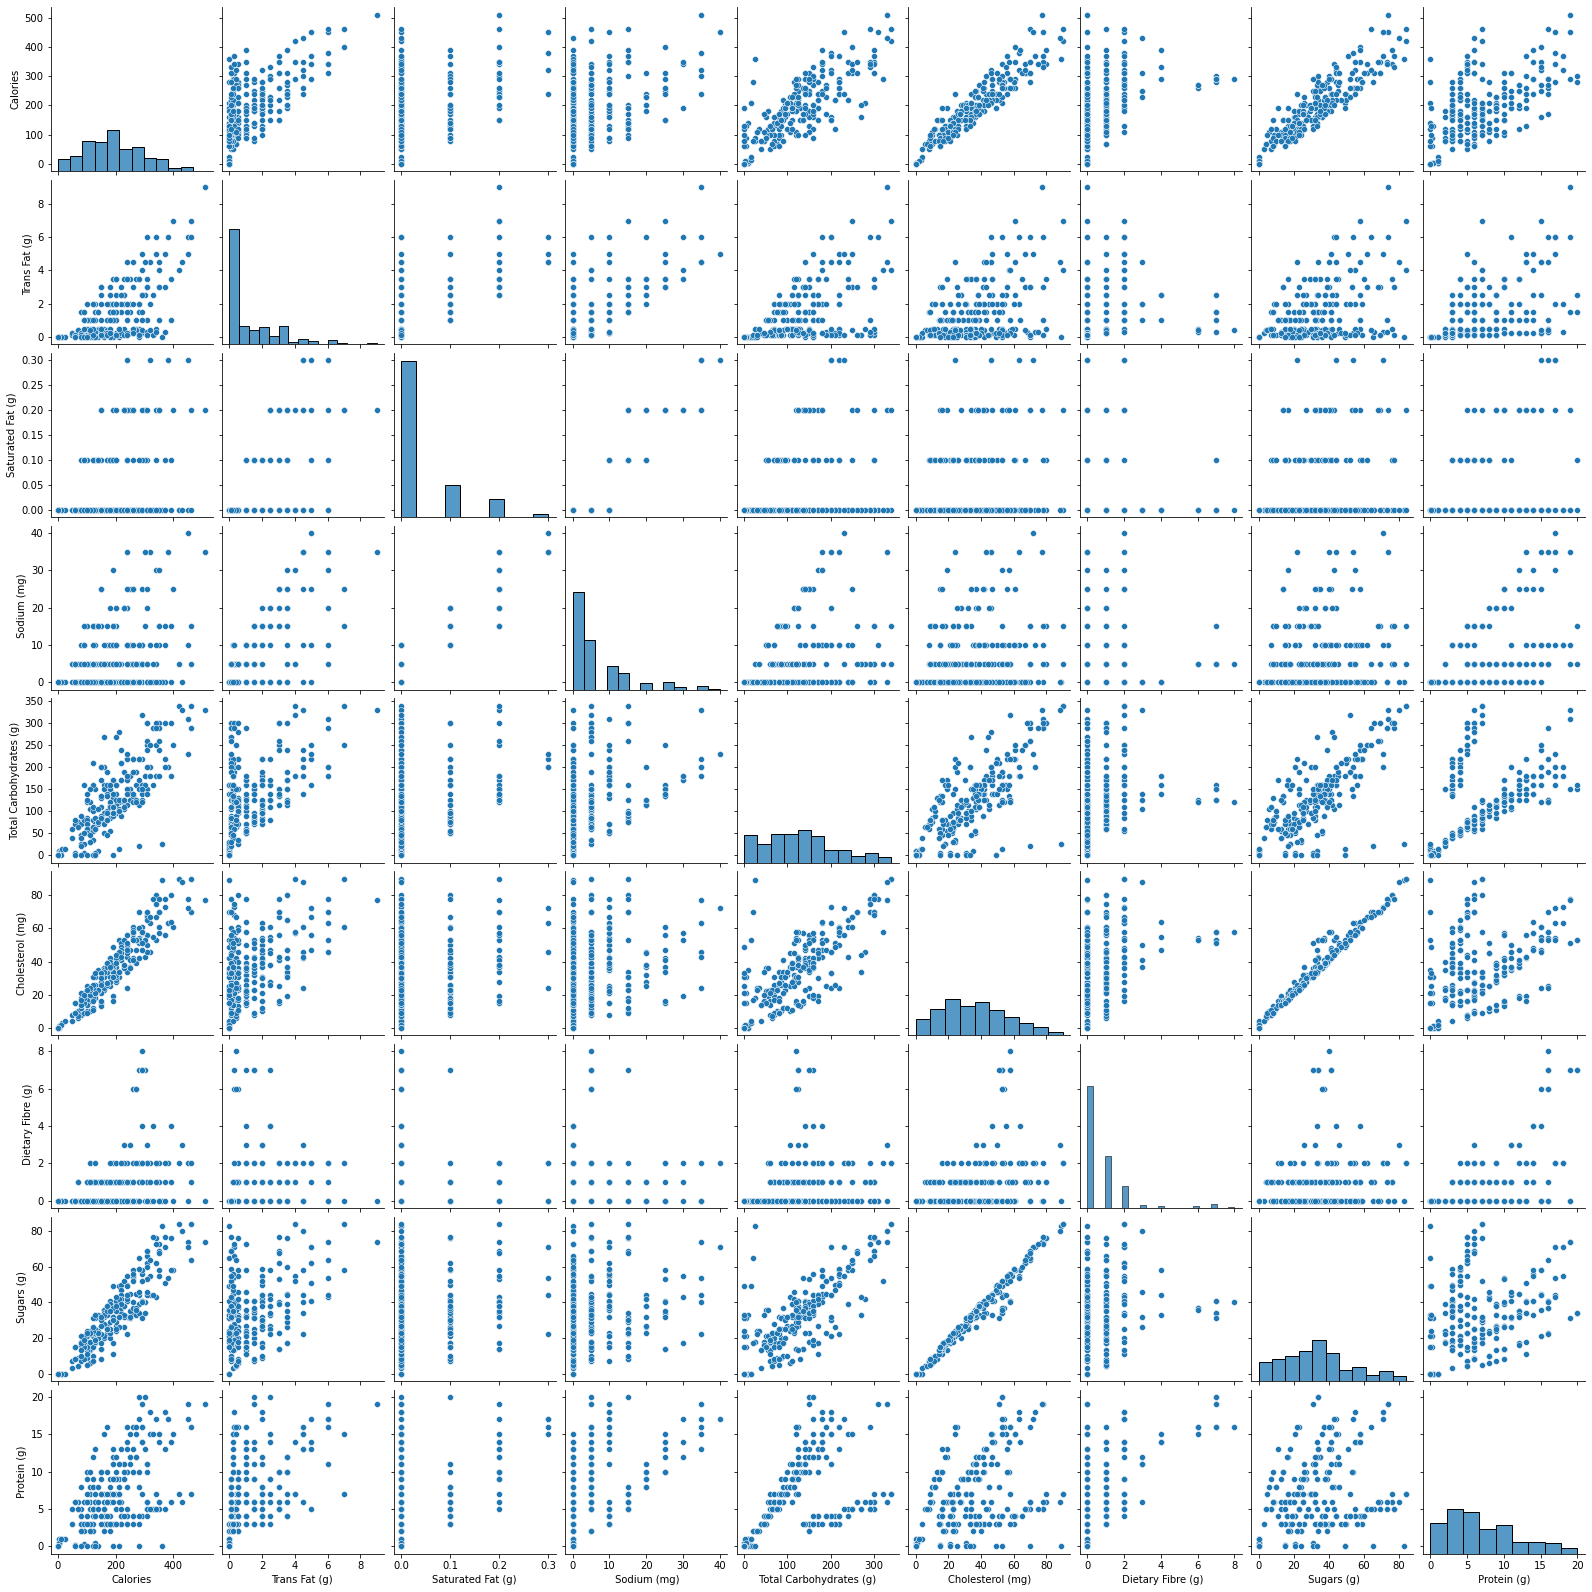

In [78]:
#QUESTION: IS THERE ANY CORRELATION BETWEEN THE NUTRITIONAL COLUMNS
#SEEMS CALORIES AND SUGAR OR CALORIES AND CHOLESTEROL SHOW A LINEAR TREND, SUGAR AND CHOLESTEROL HAVE A 
#LINEAR RELATIONSHIP WHICH IS UNUSUAL.


ax = sns.pairplot(df1)

In [79]:
#CHECKING THE FOOD CHART
df3.head()

,F1,F2,Calories,Fat(g),Carb.(g),Fiber(g),Protein (g)
0,Chonga,Bagel,300,5.0,50,3,12
1,8-Grain,Roll,380,6.0,70,7,10
2,Almond,Croissant,410,22.0,45,3,10
3,Apple,Fritter,460,23.0,56,2,7
4,Banana,Nut,420,22.0,52,2,6


In [80]:
#COMBINING F1 AND F2 AND NAMING
df3['Name'] = df3['F1']+ '' + df3['F2']

In [81]:
df3.head()

,F1,F2,Calories,Fat(g),Carb.(g),Fiber(g),Protein (g),Name
0,Chonga,Bagel,300,5.0,50,3,12,ChongaBagel
1,8-Grain,Roll,380,6.0,70,7,10,8-GrainRoll
2,Almond,Croissant,410,22.0,45,3,10,AlmondCroissant
3,Apple,Fritter,460,23.0,56,2,7,AppleFritter
4,Banana,Nut,420,22.0,52,2,6,BananaNut


In [82]:
df3.drop(['F1', 'F2'], axis=1, inplace= True)

In [83]:
df3.head()

,Calories,Fat(g),Carb.(g),Fiber(g),Protein (g),Name
0,300,5.0,50,3,12,ChongaBagel
1,380,6.0,70,7,10,8-GrainRoll
2,410,22.0,45,3,10,AlmondCroissant
3,460,23.0,56,2,7,AppleFritter
4,420,22.0,52,2,6,BananaNut


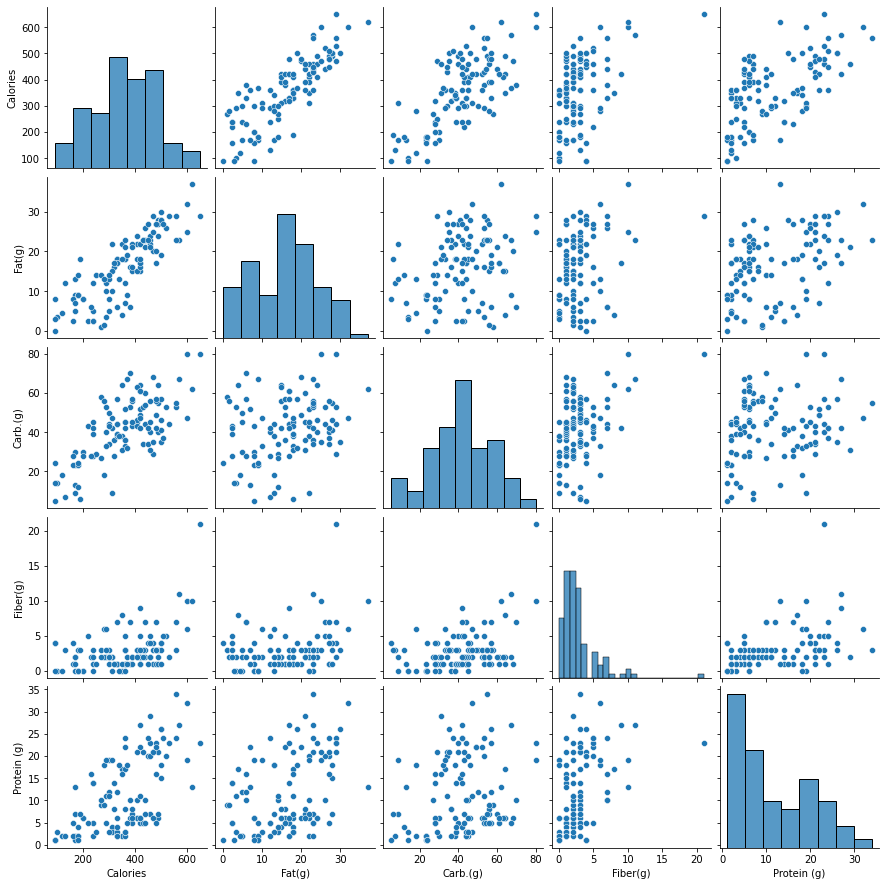

In [84]:
#QUESTION: IS THERE ANY RLEATION BETWEEN THE NURITION COLUMNS
# AGAIN FAT AND CALORIES ARE HIGHLY RELATED LINEARLY, NO RELATION BETWEEN FAT AND CARB
sns.pairplot(df3)

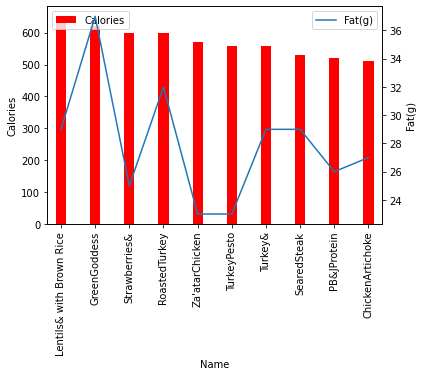

In [69]:
#QUESTION: WHICH FOODS HAVE THE HIGHEST CALORIES AND WHAT IS THE ASSOCIATED FAT CONTENT
#SEEMS LIKE LENTILS WITH BROWN RICE HAS THE HIGHEST CALORIES BUT LOW FAT CONTENT

df2= df3.sort_values('Calories', ascending= False).head(10)
fig = plt.figure() # Create matplotlib figure


ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
width= 0.3


ax = df2.plot('Name', y='Calories', color= 'red', kind= 'bar', width= width, ax= ax)
ax2 = df2.plot('Name', y='Fat(g)', kind= 'line', ax= ax2)
ax.set_ylabel('Calories')
ax.legend(loc='upper left')
ax2.set_ylabel('Fat(g)')
plt.show()

<AxesSubplot:xlabel='Name'>

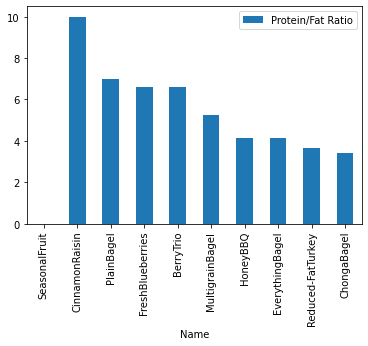

In [71]:
#QUESTION: WHICH FOODS HAVE HIGH PROTEIN/FAT RATIO
#SEEMS LIKE CINNAMON RAISIN, PLAIN BAGEL ETC ARE GOOD ON PROTEIN AND LOW ON FAT

df3['Protein/Fat Ratio'] = df3['Protein (g)']/ df3['Fat(g)'] +1
df2= df3.sort_values('Protein/Fat Ratio', ascending= False).head(10)

df2.plot('Name', y='Protein/Fat Ratio', kind='bar')

<AxesSubplot:xlabel='Name'>

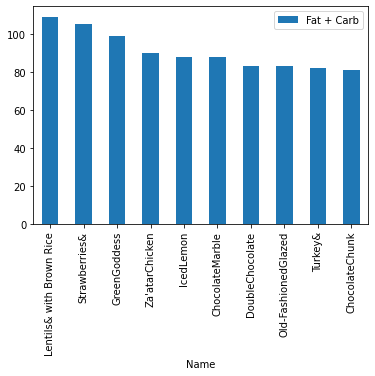

In [73]:
#QUESTION: WHICH FOODS TO AVOID (HIGH FAT AND CARB CONTENT)
#Seems Lentils with brown rice has a high fat + carb content

df3['Fat + Carb'] =df3['Fat(g)'] + df3['Carb.(g)']
df2= df3.sort_values('Fat + Carb', ascending= False).head(10)

df2.plot('Name', y='Fat + Carb', kind='bar')

<AxesSubplot:xlabel='Name'>

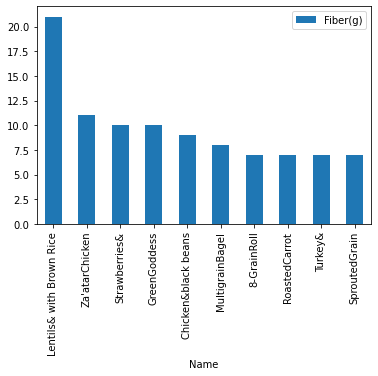

In [85]:
#QUESTION: WHAT ARE THE HIGH FIBER CONTENT FOODS
#SEEMS LENTILS WITH BROWN RICE THOUGH HAVING HIGH CARB ALSO HAS THE HIGHEST FIBER CONTENT
df2= df3.sort_values('Fiber(g)', ascending= False).head(10)
df2.plot('Name', y='Fiber(g)', kind= 'bar')